# CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model. This project contains two phase-

Data Collection Phase

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you.
more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and
at last target variable Price of the car. This data is to give you a hint about important variables in
used car model. You can make changes to it, you can add or you can remove some columns, it
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan,
Hatchback.

Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all
data pre-processing steps. Try different models with different hyper parameters and select the best
model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('file1.csv')

df.head()

,Unnamed: 0,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,0,Maruti Swift,2015,34588.0,Petrol,Manual,410499.0
1,1,Hyundai Grand i10,2014,43841.0,Petrol,Manual,354499.0
2,2,Maruti Ritz,2013,14047.0,Petrol,Manual,383999.0
3,3,Honda Accord,2012,50161.0,Petrol,Manual,520199.0
4,4,Maruti Swift,2019,15445.0,Petrol,Automatic,673399.0


In [4]:
#Drop unwanted column from dataset
df = df.drop(['Unnamed: 0'],axis=1)

df.head()

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,Maruti Swift,2015,34588.0,Petrol,Manual,410499.0
1,Hyundai Grand i10,2014,43841.0,Petrol,Manual,354499.0
2,Maruti Ritz,2013,14047.0,Petrol,Manual,383999.0
3,Honda Accord,2012,50161.0,Petrol,Manual,520199.0
4,Maruti Swift,2019,15445.0,Petrol,Automatic,673399.0


In [5]:
#shape of the dataset
df.shape

(3354, 6)

In [6]:
#Column names of the dataset
df.columns

Index(['Car Model', 'Year', 'Kilometers Driven', 'Fuel Type',
       'Transmission Type', 'Price'],
      dtype='object')

In [7]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car Model          3354 non-null   object 
 1   Year               3354 non-null   int64  
 2   Kilometers Driven  3354 non-null   float64
 3   Fuel Type          3354 non-null   object 
 4   Transmission Type  3306 non-null   object 
 5   Price              3354 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 157.3+ KB


Check for missing values

In [8]:
df.isnull().sum()

Car Model             0
Year                  0
Kilometers Driven     0
Fuel Type             0
Transmission Type    48
Price                 0
dtype: int64

In [9]:
df['Transmission Type'] = df['Transmission Type'].fillna(df['Transmission Type'].mode()[0])

In [10]:
df['Transmission Type']

0          Manual
1          Manual
2          Manual
3          Manual
4       Automatic
          ...    
3349       Manual
3350       Manual
3351       Manual
3352       Manual
3353       Manual
Name: Transmission Type, Length: 3354, dtype: object

In [11]:
df['Transmission Type'].isnull().sum()

0

In [12]:
df.isnull().sum()

Car Model            0
Year                 0
Kilometers Driven    0
Fuel Type            0
Transmission Type    0
Price                0
dtype: int64

In [13]:
import missingno

<AxesSubplot:>

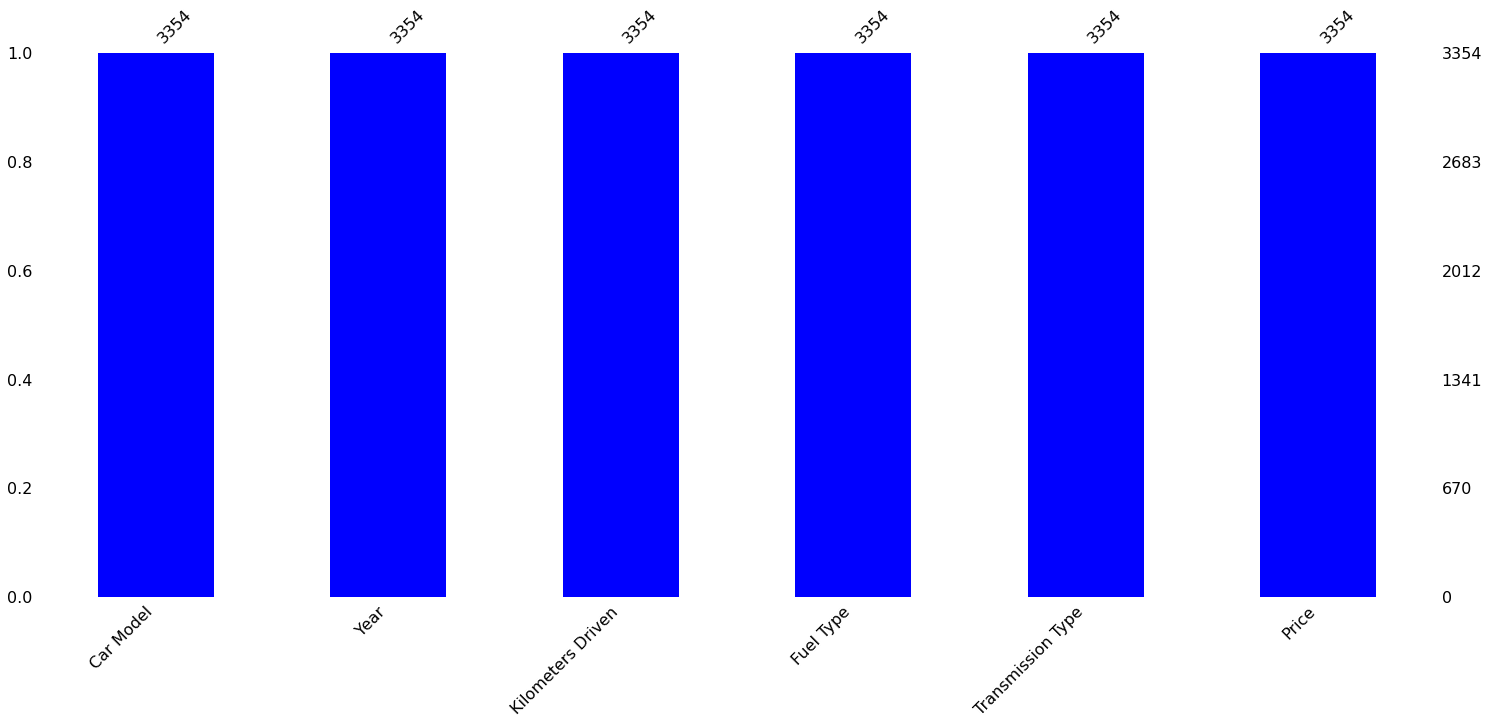

In [29]:
missingno.bar(df,color='blue')

The missing values has been resolved.

In [15]:
df.describe()

,Year,Kilometers Driven,Price
count,3354.000000,3354.000000,3.354000e+03
mean,2016.773703,45547.321705,5.103039e+05
std,2.971745,30472.565539,4.540507e+05
min,1999.000000,141.000000,1.000000e+00
25%,2015.000000,23092.250000,1.750000e+01
50%,2017.000000,40288.500000,4.743490e+05
75%,2019.000000,63000.000000,7.284740e+05
max,2022.000000,390000.000000,2.194499e+06


<AxesSubplot:>

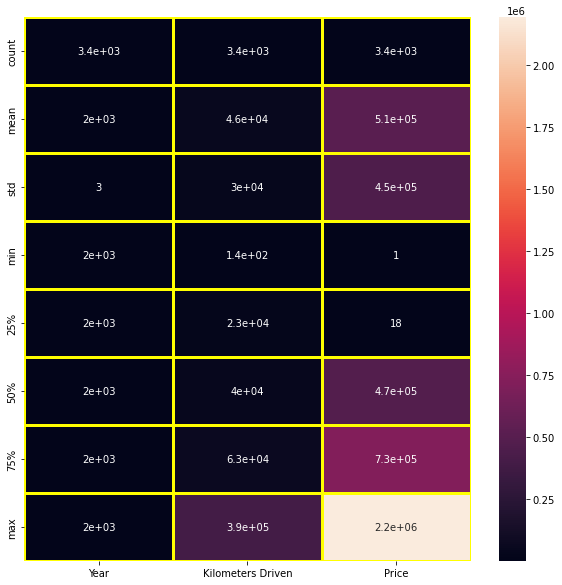

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.describe(),annot=True,linecolor='yellow',linewidths=3)

# EDA

# Univariate Analysis

In [19]:
df

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,Maruti Swift,2015,34588.0,Petrol,Manual,410499.00
1,Hyundai Grand i10,2014,43841.0,Petrol,Manual,354499.00
2,Maruti Ritz,2013,14047.0,Petrol,Manual,383999.00
3,Honda Accord,2012,50161.0,Petrol,Manual,520199.00
4,Maruti Swift,2019,15445.0,Petrol,Automatic,673399.00
...,...,...,...,...,...,...
3349,Hyundai Verna,2013,50000.0,Diesel,Manual,5.65
3350,Maruti Alto 800,2007,99941.0,Petrol,Manual,1.20
3351,Maruti Zen Estilo,2008,50000.0,Petrol,Manual,1.20
3352,Toyota Innova,2005,235000.0,Diesel,Manual,3.00


Count Plot

In [70]:
for i in df.select_dtypes(include=['object']):
    f = df[i].value_counts()
    print(f)
    print('-'*35)

Hyundai Grand i10       169
Maruti Swift            137
Maruti Baleno           136
Honda City              129
Hyundai Creta           105
                       ... 
Tata Tigor                1
Mahindra XUV300           1
Toyota Urban cruiser      1
Fiat Linea                1
OpelCorsa                 1
Name: Car Model, Length: 221, dtype: int64
-----------------------------------
Petrol          2414
Diesel           902
Petrol + CNG      36
LPG                1
Electric           1
Name: Fuel Type, dtype: int64
-----------------------------------
Manual       2578
Automatic     776
Name: Transmission Type, dtype: int64
-----------------------------------


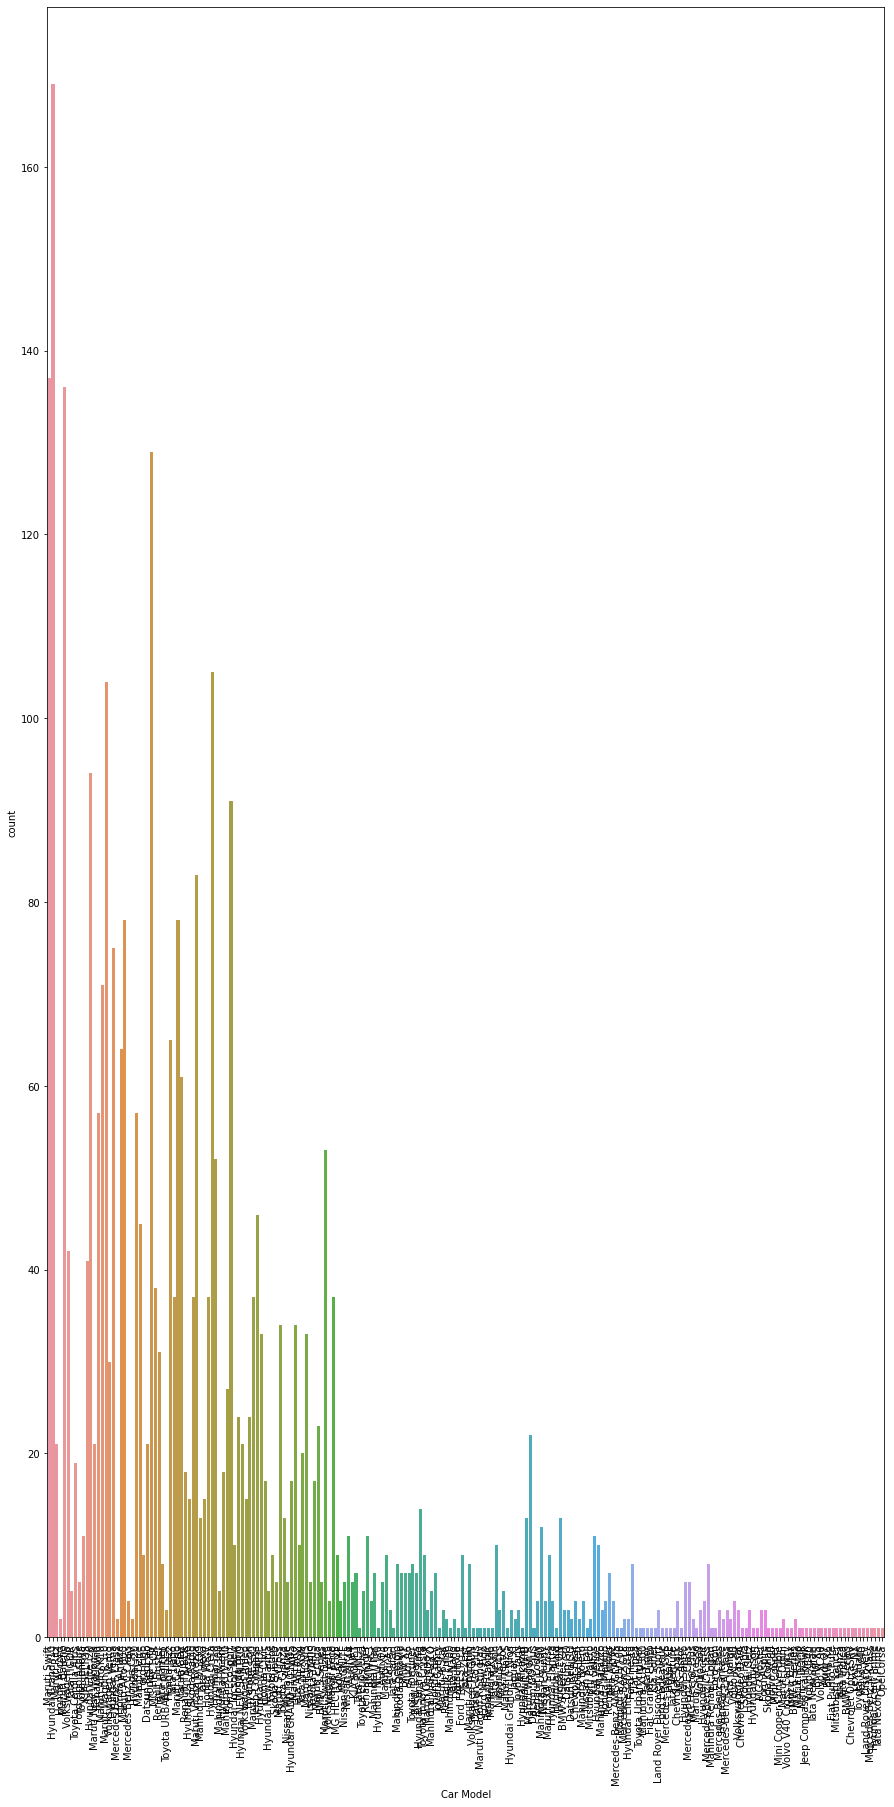

In [24]:
plt.figure(figsize=(15,30))
sns.countplot(df['Car Model'])
plt.xticks(rotation=90)
plt.show()

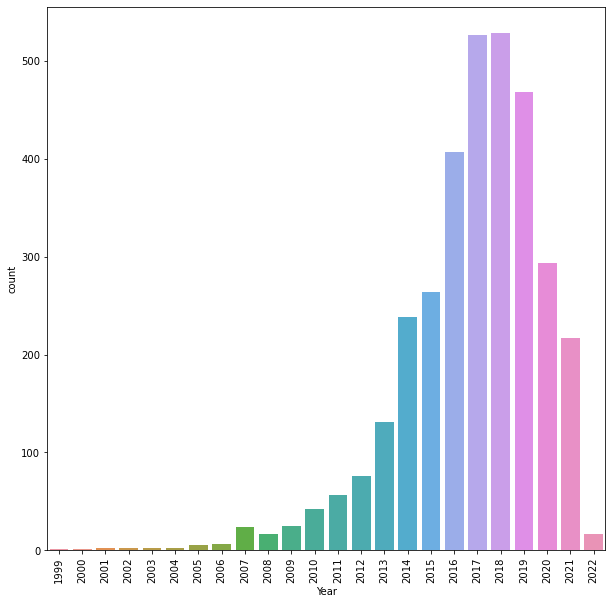

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.show()

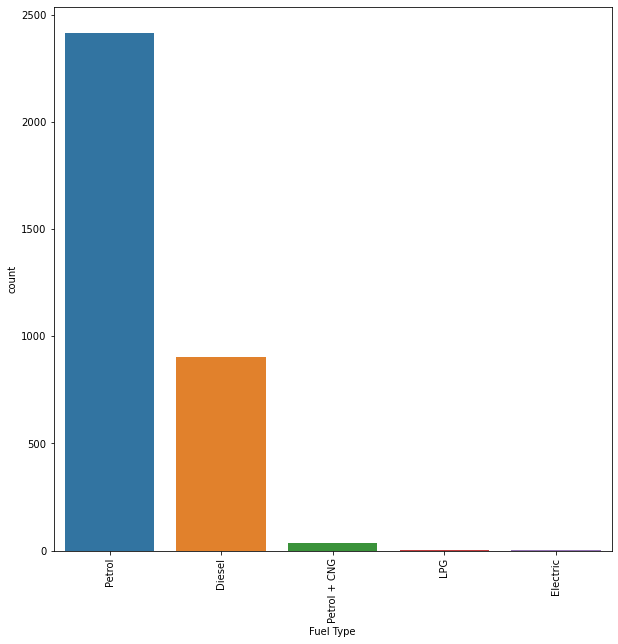

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(df['Fuel Type'])
plt.xticks(rotation=90)
plt.show()

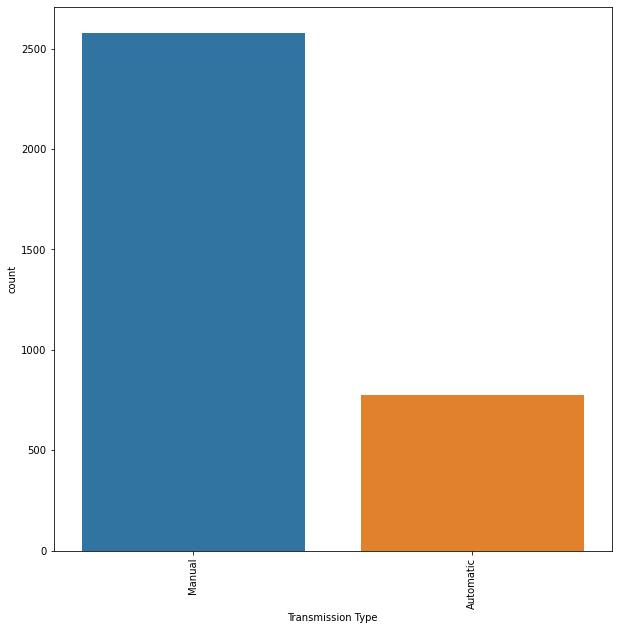

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(df['Transmission Type'])
plt.xticks(rotation=90)
plt.show()

Histogram

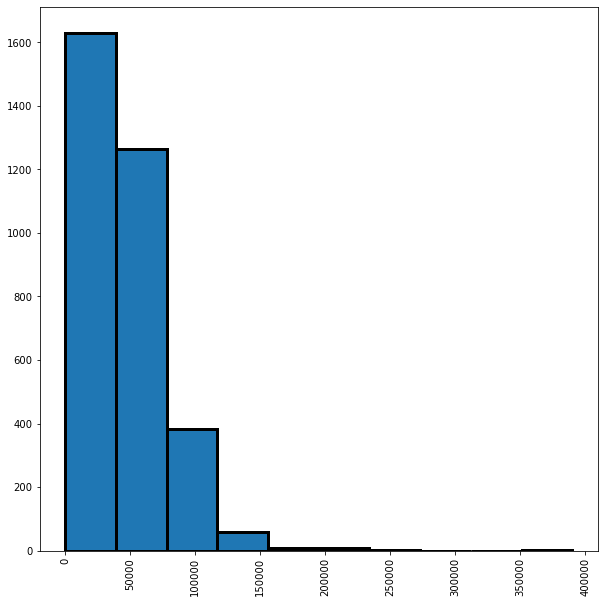

In [31]:
plt.figure(figsize=(10,10))
plt.hist(df['Kilometers Driven'],edgecolor='black',linewidth=3)
plt.xticks(rotation=90)
plt.show()

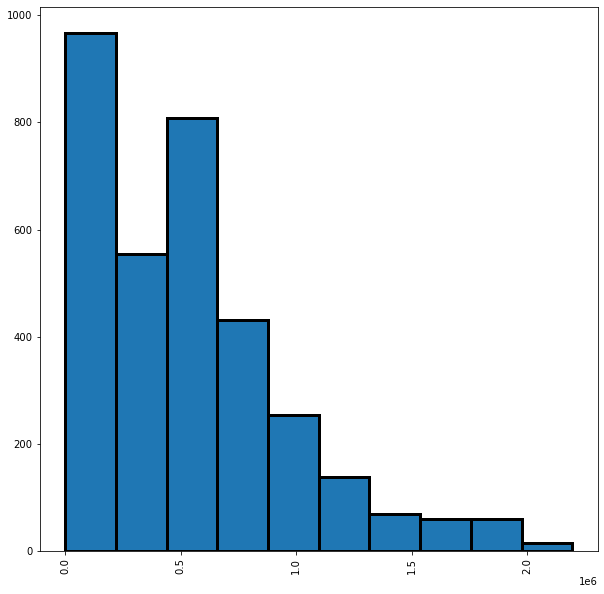

In [32]:
plt.figure(figsize=(10,10))
plt.hist(df['Price'],edgecolor='black',linewidth=3)
plt.xticks(rotation=90)
plt.show()

Distplot

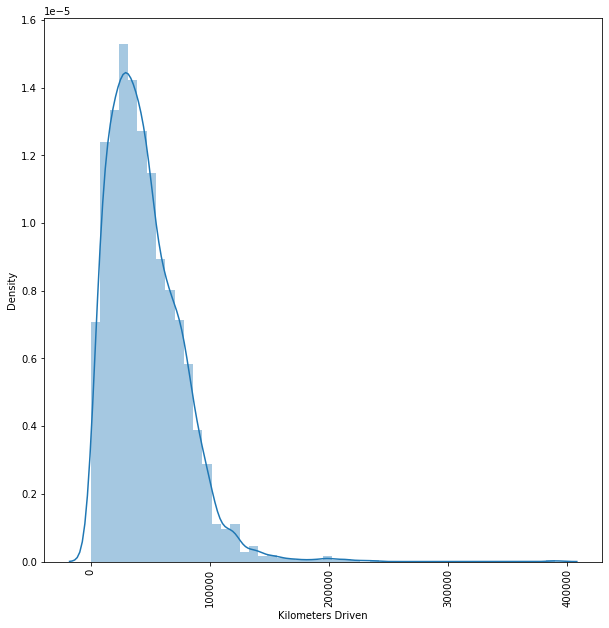

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(df['Kilometers Driven'])
plt.xticks(rotation=90)
plt.show()

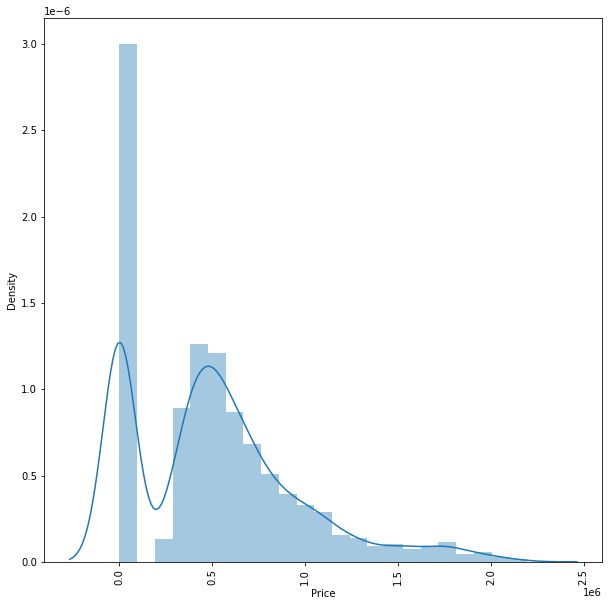

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(df['Price'])
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

Scatter Plot

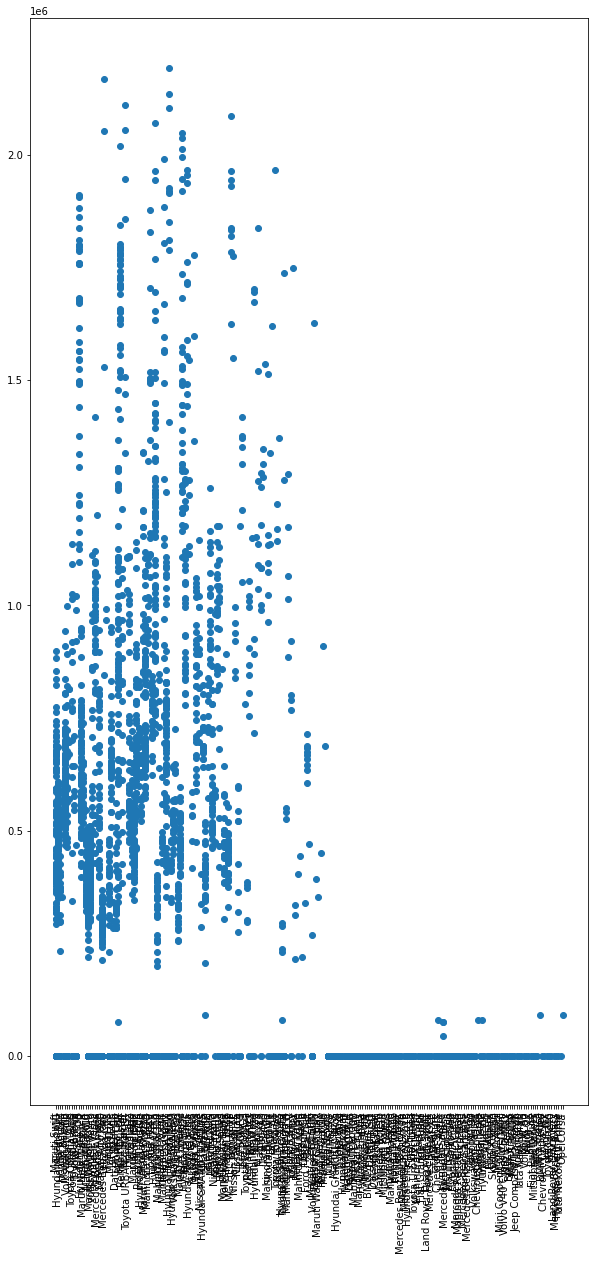

In [36]:
plt.figure(figsize=(10,20))
plt.scatter(df['Car Model'],df['Price'])
plt.xticks(rotation=90)
plt.show()

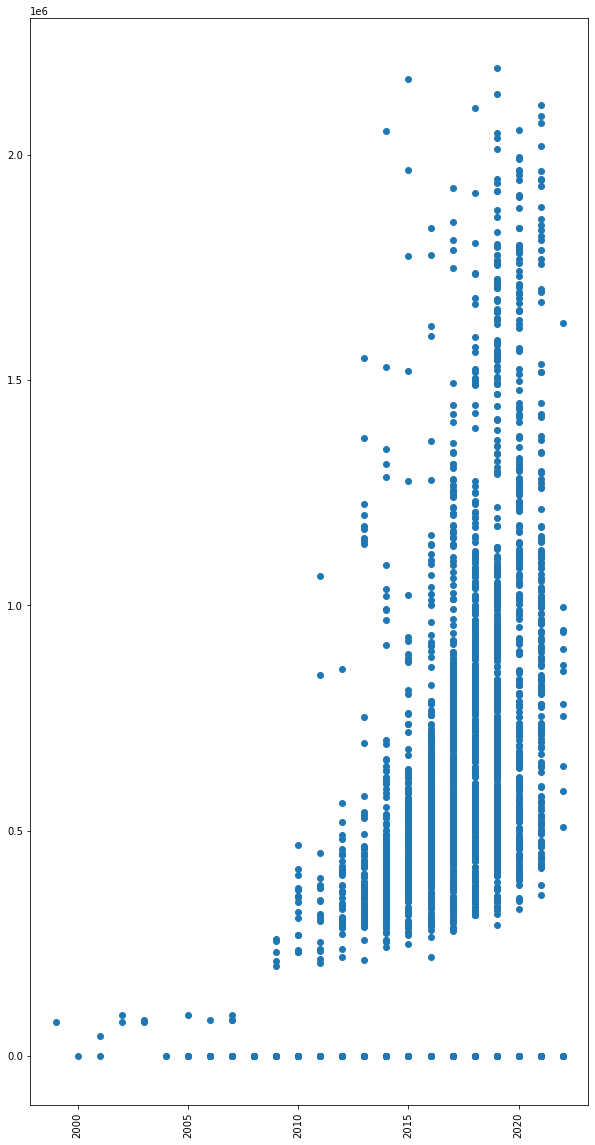

In [37]:
plt.figure(figsize=(10,20))
plt.scatter(df['Year'],df['Price'])
plt.xticks(rotation=90)
plt.show()

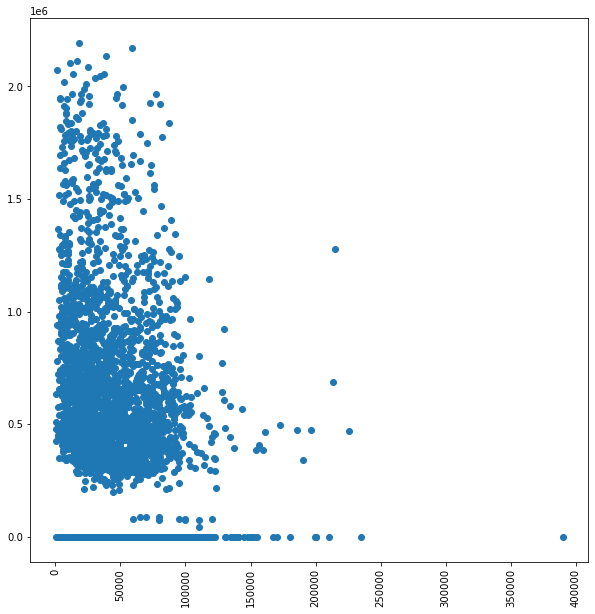

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(df['Kilometers Driven'],df['Price'])
plt.xticks(rotation=90)
plt.show()

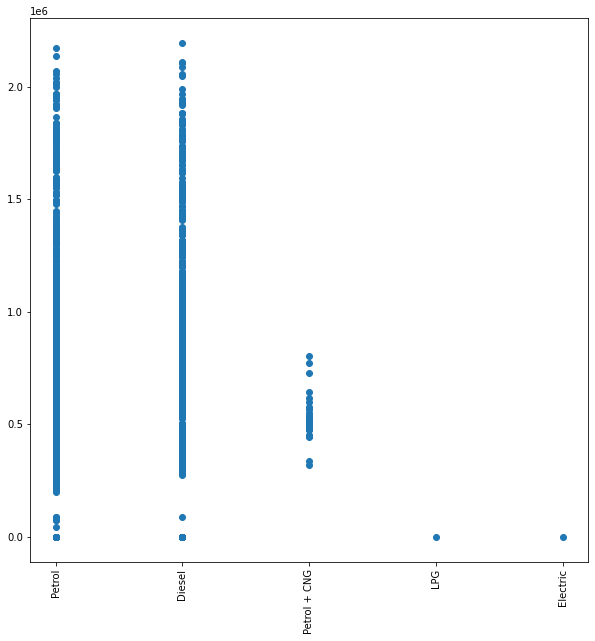

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(df['Fuel Type'],df['Price'])
plt.xticks(rotation=90)
plt.show()

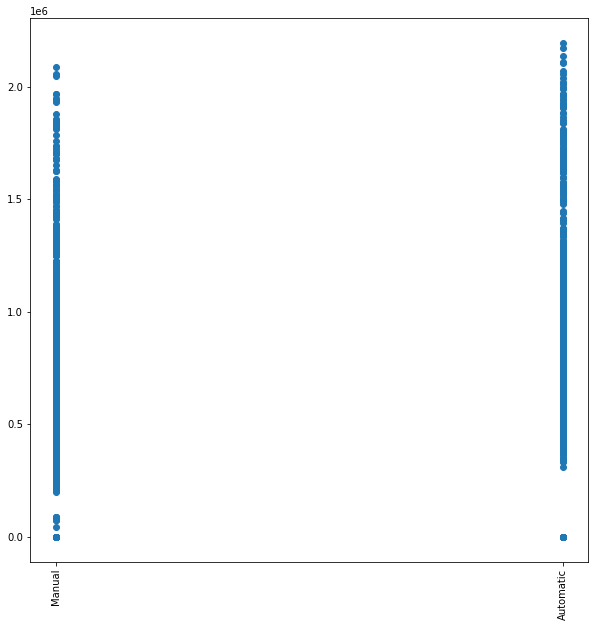

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(df['Transmission Type'],df['Price'])
plt.xticks(rotation=90)
plt.show()

LINE PLOT

AxesSubplot(0.125,0.125;0.775x0.755)


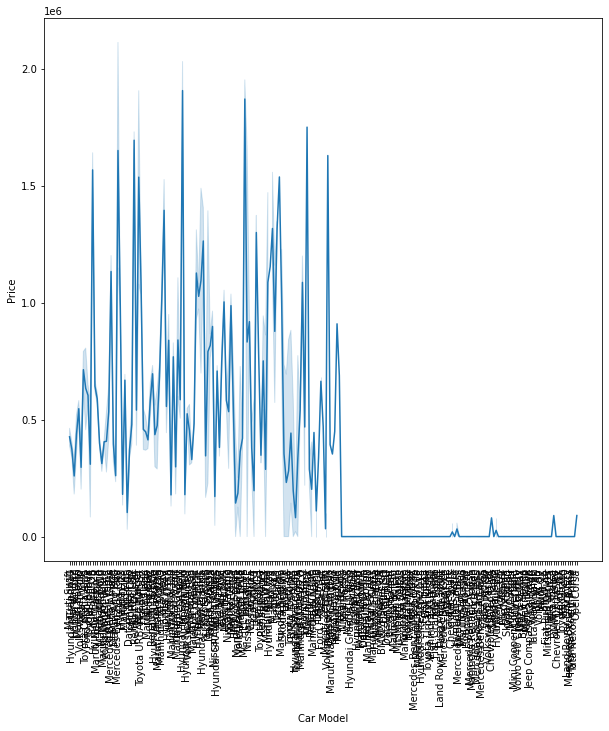

AxesSubplot(0.125,0.125;0.775x0.755)


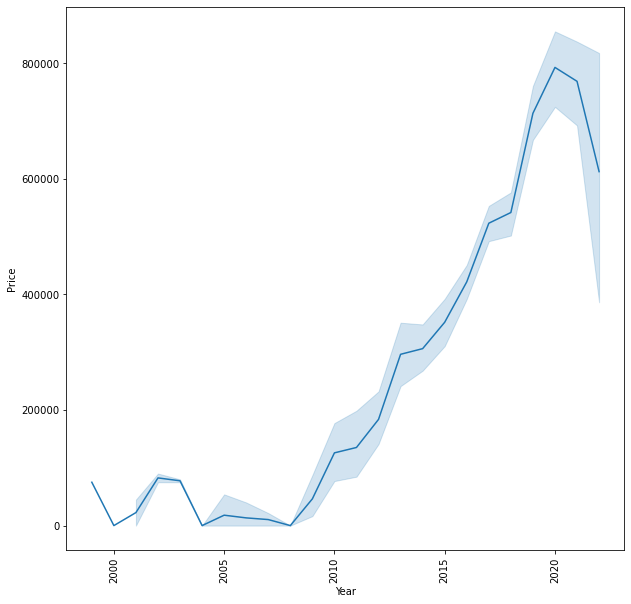

AxesSubplot(0.125,0.125;0.775x0.755)


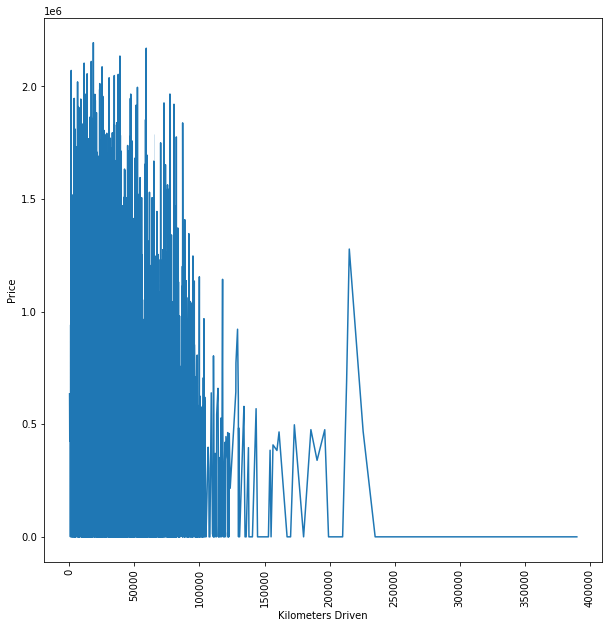

AxesSubplot(0.125,0.125;0.775x0.755)


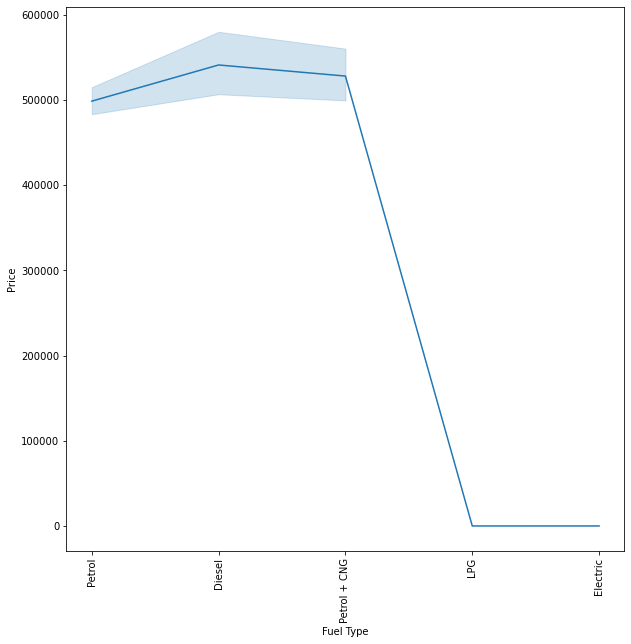

AxesSubplot(0.125,0.125;0.775x0.755)


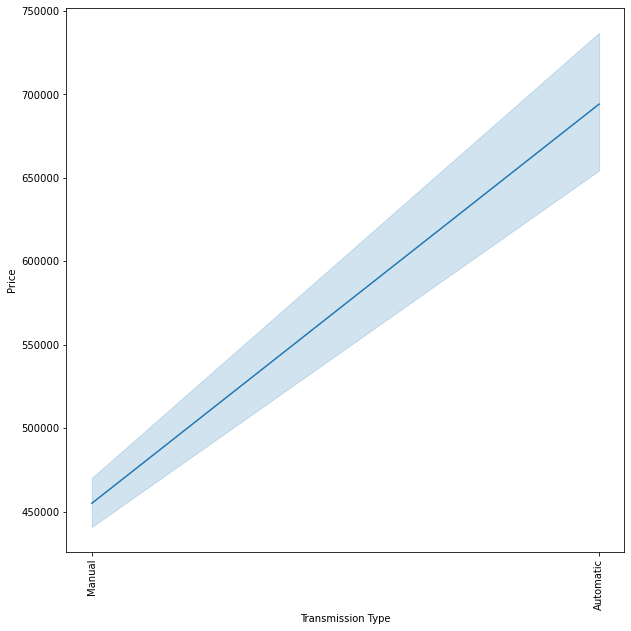

AxesSubplot(0.125,0.125;0.775x0.755)


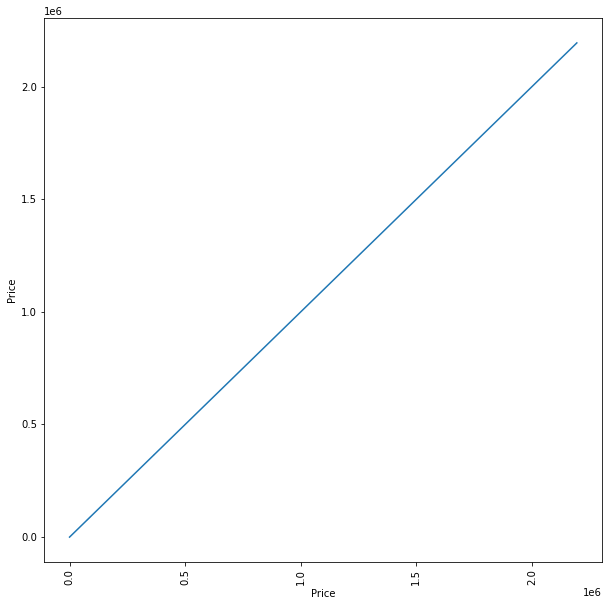

In [46]:
def line_plot():
    for i in df:
        plt.figure(figsize=(10,10))
        line = sns.lineplot(df[i],df['Price'])
        print(line)
        plt.xticks(rotation=90)
        plt.show()
line_plot()

# Pandas Profiling---EDA based approach

In [47]:
import pandas_profiling

In [48]:
from pandas_profiling import ProfileReport

In [49]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Check for outliers

Kilometers Driven

<AxesSubplot:xlabel='Kilometers Driven'>

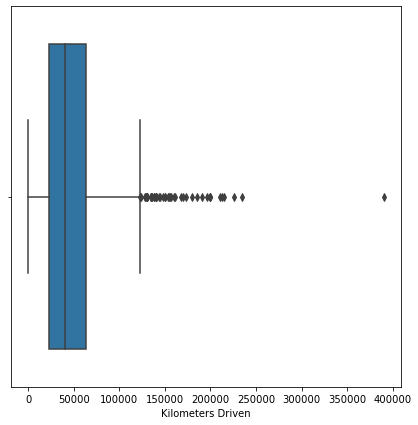

In [51]:
plt.figure(figsize=(7,7))
sns.boxplot(df['Kilometers Driven'])

In [54]:
print(df['Kilometers Driven'].quantile(0.10))
print(df['Kilometers Driven'].quantile(0.90))

11860.0
84000.7


In [55]:
df['Kilometers Driven'] = np.where(df['Kilometers Driven'] > 84000.7,84000.7,df['Kilometers Driven'])

AxesSubplot(0.125,0.125;0.775x0.755)


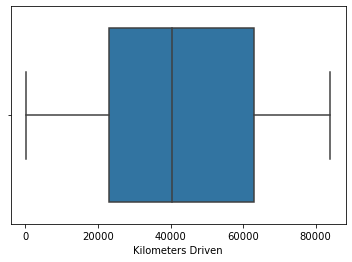

In [56]:
print(sns.boxplot(df['Kilometers Driven']))

Price

<AxesSubplot:xlabel='Price'>

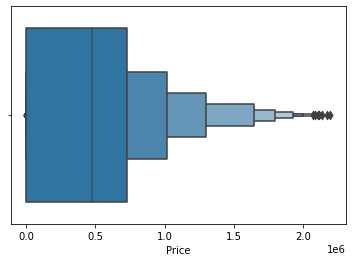

In [57]:
sns.boxenplot(df['Price'])

<AxesSubplot:xlabel='Price'>

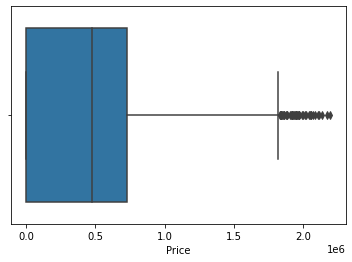

In [59]:
sns.boxplot(df['Price'])

In [61]:
print(df['Price'].quantile(0.10))
print(df['Price'].quantile(0.90))

5.2
1099049.0000000005


In [62]:
df['Price'] = np.where(df['Price'] > 1099049.0000000005,1099049.0000000005,df['Price'])

AxesSubplot(0.125,0.125;0.775x0.755)


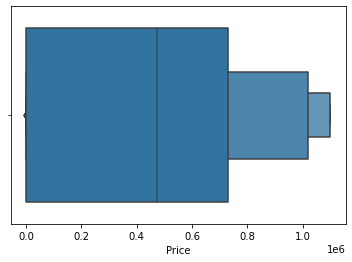

In [65]:
print(sns.boxenplot(df['Price']))

AxesSubplot(0.125,0.125;0.775x0.755)


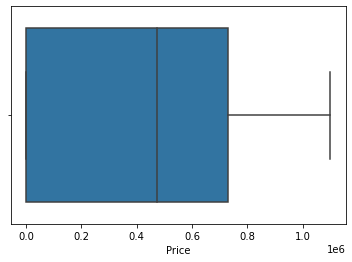

In [66]:
print(sns.boxplot(df['Price']))

I have treated outliers now I will proceed to correlation matrix

# Correlation Matrix

In [71]:
df_corr = df.corr()
df_corr

,Year,Kilometers Driven,Price
Year,1.000000,-0.575689,0.423247
Kilometers Driven,-0.575689,1.000000,-0.223296
Price,0.423247,-0.223296,1.000000


<AxesSubplot:>

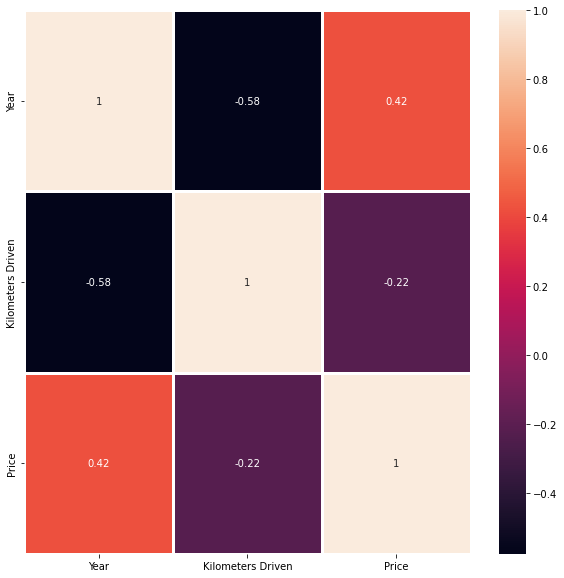

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,linecolor='white',linewidths=3)

# Encoding 

In [79]:
df

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,Maruti Swift,2015,34588.0,Petrol,Manual,410499.00
1,Hyundai Grand i10,2014,43841.0,Petrol,Manual,354499.00
2,Maruti Ritz,2013,14047.0,Petrol,Manual,383999.00
3,Honda Accord,2012,50161.0,Petrol,Manual,520199.00
4,Maruti Swift,2019,15445.0,Petrol,Automatic,673399.00
...,...,...,...,...,...,...
3349,Hyundai Verna,2013,50000.0,Diesel,Manual,5.65
3350,Maruti Alto 800,2007,84000.7,Petrol,Manual,1.20
3351,Maruti Zen Estilo,2008,50000.0,Petrol,Manual,1.20
3352,Toyota Innova,2005,84000.7,Diesel,Manual,3.00


In [81]:
df.dtypes

Car Model             object
Year                   int64
Kilometers Driven    float64
Fuel Type             object
Transmission Type     object
Price                float64
dtype: object

In [80]:
from sklearn.preprocessing import OrdinalEncoder

In [84]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["Transmission Type", "Fuel Type", "Car Model"]
df=ordinal_encode(df, column)
df


,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type,Price
0,130.0,2015,34588.0,3.0,1.0,410499.00
1,58.0,2014,43841.0,3.0,1.0,354499.00
2,125.0,2013,14047.0,3.0,1.0,383999.00
3,37.0,2012,50161.0,3.0,1.0,520199.00
4,130.0,2019,15445.0,3.0,0.0,673399.00
...,...,...,...,...,...,...
3349,70.0,2013,50000.0,0.0,1.0,5.65
3350,111.0,2007,84000.7,3.0,1.0,1.20
3351,137.0,2008,50000.0,3.0,1.0,1.20
3352,201.0,2005,84000.7,0.0,1.0,3.00


I defined a function to apply OrdinalEncoder on my feature columns to convert the object datatype columns to numeric format.

In [85]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))

Shape of our data frame post encoding shows 3354 Rows and 6 columns



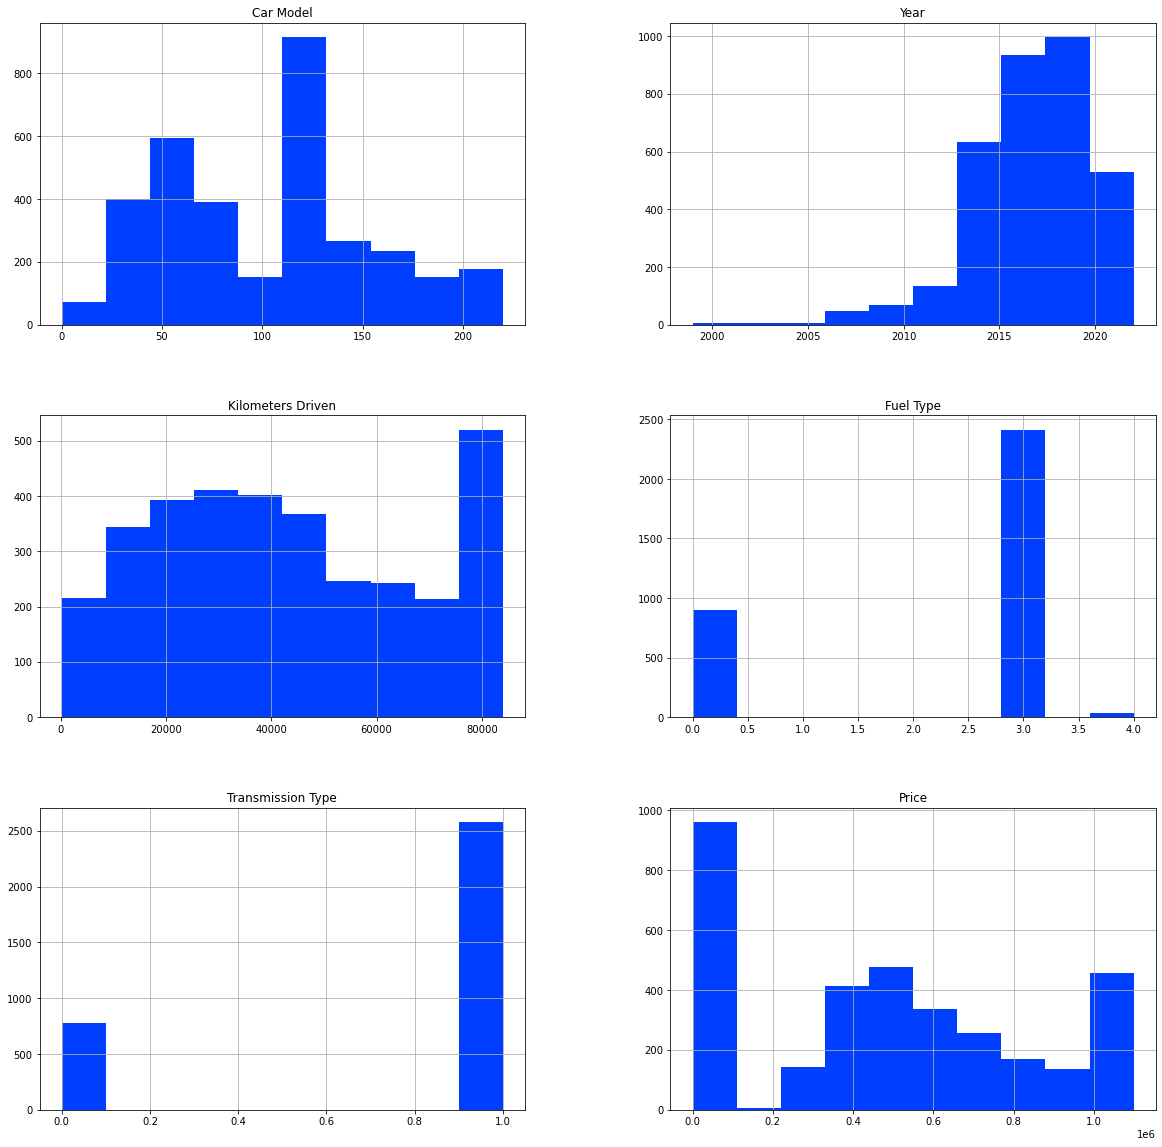

In [86]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

# Skewness

In [87]:
df.skew()

Car Model            0.326118
Year                -1.211778
Kilometers Driven    0.241039
Fuel Type           -1.016861
Transmission Type   -1.274608
Price                0.159282
dtype: float64

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [102]:
X = df.drop(['Price'],axis=1)
Y = df['Price']

In [103]:
from sklearn.preprocessing import power_transform
X_scaled=power_transform(X,method='yeo-johnson')
X_scaled

array([[ 0.61957866, -0.60979083, -0.22320889,  0.5789907 ,  0.54864245],
       [-0.79990621, -0.94519017,  0.14967719,  0.5789907 ,  0.54864245],
       [ 0.53288229, -1.27844166, -1.24301002,  0.5789907 ,  0.54864245],
       ...,
       [ 0.7388636 , -2.91291658,  0.38040749,  0.5789907 ,  0.54864245],
       [ 1.73940021, -3.86861727,  1.49068967, -1.6289554 ,  0.54864245],
       [-1.47162557, -2.26543372,  1.49068967, -1.6289554 ,  0.54864245]])

# Feature Selection

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled.head()

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type
0,0.560994,-0.595802,-0.352824,0.594435,0.548642
1,-0.846374,-0.932443,0.024850,0.594435,0.548642
2,0.463260,-1.269273,-1.191234,0.594435,0.548642
3,-1.256857,-1.606292,0.282809,0.594435,0.548642
4,0.560994,0.748873,-1.134172,0.594435,-1.822681


# VIF

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['features'] = X_scaled.columns
vif

,vif,features
0,1.009532,Car Model
1,1.558043,Year
2,1.705919,Kilometers Driven
3,1.151839,Fuel Type
4,1.025186,Transmission Type


# Model Building

In [105]:
#import required libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

In [106]:
X_scaled

,Car Model,Year,Kilometers Driven,Fuel Type,Transmission Type
0,0.560994,-0.595802,-0.352824,0.594435,0.548642
1,-0.846374,-0.932443,0.024850,0.594435,0.548642
2,0.463260,-1.269273,-1.191234,0.594435,0.548642
3,-1.256857,-1.606292,0.282809,0.594435,0.548642
4,0.560994,0.748873,-1.134172,0.594435,-1.822681
...,...,...,...,...,...
3349,-0.611813,-1.269273,0.276238,-1.643203,0.548642
3350,0.189605,-3.294237,1.664024,0.594435,0.548642
3351,0.697821,-2.956267,0.276238,0.594435,0.548642
3352,1.948815,-3.970747,1.664024,-1.643203,0.548642


In [107]:
Y

0       410499.00
1       354499.00
2       383999.00
3       520199.00
4       673399.00
          ...    
3349         5.65
3350         1.20
3351         1.20
3352         3.00
3353         2.10
Name: Price, Length: 3354, dtype: float64

# Linear Regression

In [109]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    lr_r2 = r2_score(y_test, y_lr)
    
    if lr_r2>maxAccuracy:
        maxAccuracy=lr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.23537503591228082  on Random State 83


In [110]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=83)

#training our model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
lr_r2 = r2_score(y_test, y_lr)

#R2 Score
print("R2 score : ", lr_r2)

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_lr))
print("Mean Square Error : ",mean_squared_error(y_test,y_lr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_lr)))

R2 score :  0.23537503591228082
[-5.51446350e-01 -5.12398681e-01 -3.18937539e-01 -3.40891250e-01
 -3.35612831e+03]
Cross Validation Score :  -671.5703958312424
Mean Absolute Error : 261844.95203741355
Mean Square Error :  104392142706.40453
Root Mean Square Error : 323097.72934269364


In [111]:
#K-fold cross validation
K_fold = KFold(5,random_state=83,shuffle=True)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("K-Fold Cross Validation Score : " , l1.mean())

KFold(n_splits=5, random_state=83, shuffle=True)
[0.22669396 0.21379466 0.16321579 0.16585429 0.18021045]
K-Fold Cross Validation Score :  0.1899538309949791


In [112]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=83)
print(shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=shuffle)
print(l2)
print("Shuffle Split : ",l2.mean())

ShuffleSplit(n_splits=5, random_state=83, test_size=0.3, train_size=None)
[0.23537504 0.16995953 0.19661071 0.21541689 0.19889665]
Shuffle Split :  0.2032517642929989


# Decision Tree

In [114]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    dt_r2 = r2_score(y_test, y_dt)
    
    if dt_r2>maxAccuracy:
        maxAccuracy=dt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.16045690196067952  on Random State 65


In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=65)

#training our model
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
dt_r2 = r2_score(y_test, y_dt)

#R2 Score
print("R2 score : ", dt_r2)

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_dt))
print("Mean Square Error : ",mean_squared_error(y_test,y_dt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_dt)))

R2 score :  0.13643678467581277
[-9.50090321e-01 -1.80310822e+00 -8.02195355e-01 -5.87615649e-01
 -3.28081518e+03]
Cross Validation Score :  -656.9916377829909
Mean Absolute Error : 198979.58292618344
Mean Square Error :  120172193957.22458
Root Mean Square Error : 346658.6129857797


In [116]:
K_fold = KFold(5,random_state=65,shuffle=True)
print(K_fold)
l11 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(l11)
print("K-Fold Cross Validation Score : " , l11.mean())

KFold(n_splits=5, random_state=65, shuffle=True)
[ 0.06638581  0.1641929  -0.02375796 -0.0852847   0.06581876]
K-Fold Cross Validation Score :  0.03747096210560448


In [117]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=65)
print(shuffle)
l21 = cross_val_score(dt,X_scaled,Y,cv=shuffle)
print(l21)
print("Shuffle Split : ",l21.mean())

ShuffleSplit(n_splits=5, random_state=65, test_size=0.3, train_size=None)
[ 0.15206776 -0.1078432   0.09247117 -0.01581929  0.00905007]
Shuffle Split :  0.025985300717723293


# KNN

In [118]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    knn_r2 = r2_score(y_test, y_knn)
    
    if knn_r2>maxAccuracy:
        maxAccuracy=knn_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.24405235906083378  on Random State 83


In [119]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=83)

#training our model
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
knn_r2 = r2_score(y_test, y_knn)

#R2 Score
print("R2 score : ", knn_r2)

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_knn))
print("Mean Square Error : ",mean_squared_error(y_test,y_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_knn)))

R2 score :  0.24405235906083378
[-4.84192525e-01 -8.17670115e-01 -3.21481782e-01 -4.99978987e-01
 -3.73555976e+03]
Cross Validation Score :  -747.5366174434878
Mean Absolute Error : 246909.23086792455
Mean Square Error :  103207451650.03273
Root Mean Square Error : 321259.1658615093


In [120]:
#K-Fold
K_fold = KFold(5,random_state=83,shuffle=True)
print(K_fold)
k = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k)
print("K-Fold Cross Validation Score : " , k.mean())

KFold(n_splits=5, random_state=83, shuffle=True)
[0.21747927 0.17189231 0.10373448 0.12295115 0.1546471 ]
K-Fold Cross Validation Score :  0.15414086391184037


In [121]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=83)
print(shuffle)
k1 = cross_val_score(knn,X_scaled,Y,cv=shuffle)
print(k1)
print("Shuffle Split : ",k1.mean())

ShuffleSplit(n_splits=5, random_state=83, test_size=0.3, train_size=None)
[0.24405236 0.13370301 0.19903262 0.20579652 0.16950921]
Shuffle Split :  0.19041874460393463


# RANDOM FOREST

In [122]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    rf_r2 = r2_score(y_test, y_rf)
    
    if rf_r2>maxAccuracy:
        maxAccuracy=rf_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.46870695264798046  on Random State 38


In [123]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=38)

#training our model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
rf_r2 = r2_score(y_test, y_rf)

#R2 Score
print("R2 score : ", rf_r2)

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_rf))
print("Mean Square Error : ",mean_squared_error(y_test,y_rf))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_rf)))

R2 score :  0.47549202803854196
[-1.38333192e-01 -5.03562132e-01 -8.17016716e-02 -9.59001863e-02
 -2.89406112e+03]
Cross Validation Score :  -578.976124059192
Mean Absolute Error : 195236.94934867267
Mean Square Error :  73546201300.45618
Root Mean Square Error : 271194.0288805345


In [124]:
#K-Fold
K_fold = KFold(5,random_state=38,shuffle=True)
print(K_fold)
r = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r)
print("K-Fold Cross Validation Score : " , r.mean())

KFold(n_splits=5, random_state=38, shuffle=True)
[0.48044021 0.4056165  0.41904694 0.44441614 0.35975035]
K-Fold Cross Validation Score :  0.42185402755715523


In [125]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=38)
print(shuffle)
r1 = cross_val_score(rf,X_scaled,Y,cv=shuffle)
print(r1)
print("Shuffle Split : ",r1.mean())

ShuffleSplit(n_splits=5, random_state=38, test_size=0.3, train_size=None)
[0.4669306  0.39294842 0.3834505  0.38689716 0.37529087]
Shuffle Split :  0.40110350944263373


# Gradient Boost

In [126]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    gb_r2 = r2_score(y_test, y_gb)
    
    if gb_r2>maxAccuracy:
        maxAccuracy=gb_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.4090908779073379  on Random State 3


In [127]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=3)

#training our model
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
gb_r2 = r2_score(y_test, y_gb)

#R2 Score
print("R2 score : ", gb_r2)

#Cross Validation Score
cross_score_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_score_gb)
print("Cross Validation Score : ",cross_score_gb.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gb))
print("Mean Square Error : ",mean_squared_error(y_test,y_gb))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_gb)))

R2 score :  0.4087700195829729
[-2.06087789e-01 -3.80275031e-01 -7.09560156e-02 -1.65212054e-01
 -3.07501214e+03]
Cross Validation Score :  -615.1669350783743
Mean Absolute Error : 227177.50223583402
Mean Square Error :  83230757141.90562
Root Mean Square Error : 288497.4127126717


In [129]:
K_fold = KFold(5,random_state=3,shuffle=True)
print(K_fold)
g = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g)
print("K-Fold Cross Validation Score : " , g.mean())

print('-'*50)

shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
g1 = cross_val_score(gb,X_scaled,Y,cv=shuffle)
print(g1)
print("Shuffle Split : ",g1.mean())


KFold(n_splits=5, random_state=3, shuffle=True)
[0.40761812 0.38466494 0.34291205 0.34255343 0.36871226]
K-Fold Cross Validation Score :  0.36929215853899205
--------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.37264852 0.35858653 0.36481783 0.34475569 0.34631624]
Shuffle Split :  0.3574249652392725


# XgBoost

In [130]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    xgbt=xgb.XGBRegressor()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    xgbt_r2 = r2_score(y_test, y_xgbt)
    
    if xgbt_r2>maxAccuracy:
        maxAccuracy=xgbt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5415197783546648  on Random State 61


In [131]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=61)

#training our model
xgbt=xgb.XGBRegressor()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
xgbt_r2 = r2_score(y_test, y_xgbt)

#R2 Score
print("R2 score : ", xgbt_r2)

#Cross Validation Score
cross_score_xgbt = cross_val_score(xgbt,X_scaled,Y,cv=5)
print(cross_score_xgbt)
print("Cross Validation Score : ",cross_score_xgbt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_xgbt))
print("Mean Square Error : ",mean_squared_error(y_test,y_xgbt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_xgbt)))

R2 score :  0.5415197783546648
[ 5.19193089e-02 -2.77596994e-01  3.99492164e-02  1.08452458e-01
 -2.48342694e+03]
Cross Validation Score :  -496.70084257046994
Mean Absolute Error : 176268.6771682403
Mean Square Error :  62236339718.163635
Root Mean Square Error : 249472.12212622803


In [132]:
#K-Fold
K_fold = KFold(5,random_state=61,shuffle=True)
print(K_fold)
xg = cross_val_score(xgbt,X_scaled,Y,cv=K_fold)
print(xg)
print("K-Fold Cross Validation Score : " , xg.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=61)
print(shuffle)
xg1 = cross_val_score(xgbt,X_scaled,Y,cv=shuffle)
print(xg1)
print("Shuffle Split : ",xg1.mean())

KFold(n_splits=5, random_state=61, shuffle=True)
[0.58776185 0.49875873 0.4844075  0.50070247 0.57479771]
K-Fold Cross Validation Score :  0.5292856515703489
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=61, test_size=0.3, train_size=None)
[0.54151978 0.50623555 0.52580435 0.46106744 0.45750093]
Shuffle Split :  0.4984256094659621


# R2 scores

In [133]:
print("R2 Scores : ")
print("---------------------------------------------")
print("Linear Regression :        ",lr_r2*100)
print("Decision Tree :            ",dt_r2*100)
print("KNN :                      ",knn_r2*100)
print("Random Forest :            ",rf_r2*100)
print("Gradient Boost :           ",gb_r2*100)
print("XGBoost :                  ",xgbt_r2*100)

R2 Scores : 
---------------------------------------------
Linear Regression :         23.53750359122808
Decision Tree :             13.643678467581278
KNN :                       24.405235906083377
Random Forest :             47.54920280385419
Gradient Boost :            40.877001958297285
XGBoost :                   54.15197783546648


# Hyperparameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
#Choosing XG Boost Regressor

params = {
    'max_depth' : [3,6,10],
    'learning_rate' : [0.01,0.05,0.1],
    'n_estimators' : [100,150,200],
    'colsample_bytree' : [0.3,0.7]
}

I have chosen the XGB regressor as my best model since it is able to provide me the highest R2 score plus the model is doing better in Cross validation score too. In the above cell I have listed all the parameters for XGB regressor that can be used for hyper tuning our final model.

In [136]:
gs_xgboost = GridSearchCV(xgbt,param_grid=params,scoring='neg_mean_squared_error',verbose=1)

gs_xgboost

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_o...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [137]:
gs_xgboost.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_o...
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [138]:
gs_xgboost.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200}

In [139]:
gs_xgboost.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [143]:
final_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("R2 Score :",r2_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Mean Absolute Error :",mean_absolute_error(y_test,final_model_pred))
print("Mean Square Error : ",mean_squared_error(y_test,final_model_pred))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,final_model_pred)))
print("------------------------------------------------------------------------")

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
------------------------------------------------------------------------
[462088.34 952450.75 300632.66 ... 368083.12 980642.56 424966.84]
R2 Score : 0.5586933139664205
------------------------------------------------------------------------
Mean Absolute Error : 183130.16664674188
Mean Square Error :  59905120297.

We have built our final model using the hyper tuned parameters which look like it is not doing better than the default values but it can always be tuned better to get better results.

In [148]:
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame({
    'Predicted' : final_model_pred
})
predicted_output['Actual'] = df['Price']

In [149]:
predicted_output

,Predicted,Actual
0,462088.34375,410499.0
1,952450.75000,354499.0
2,300632.65625,383999.0
3,437504.34375,520199.0
4,453256.43750,673399.0
...,...,...
1002,351747.84375,663099.0
1003,313838.65625,634299.0
1004,368083.12500,509599.0
1005,980642.56250,516599.0


Here we have created a dataframe that shows us the predicted used car prices and the actual used car prices that was obtained by scraping data from the websites